# **Final Project: Regression Analysis (Medical Cost Dataset)**

### **Author:** Deb St. Cyr
### **Date:** November 2025


### Introduction
The Medical Cost dataset contains information about patients and their medical insurance charges. The goal of this project is to build a regression model that can predict a person’s medical costs based on demographic and health-related features such as age, BMI, smoking status, and number of dependents. Understanding how these factors contribute to insurance charges can support decision-making for healthcare providers, insurance companies, and policy analysts.

This notebook walks through the complete regression workflow:

- Importing and inspecting the dataset

- Exploring distributions and identifying patterns

- Cleaning, preprocessing, and encoding categorical data

- Selecting features and defining the target

- Training a baseline Linear Regression model

- Building improved versions using pipelines

- Comparing model performance using regression metrics

- Reflecting on findings and insights

The dataset includes both numerical and categorical features, which allows for meaningful exploration and model building. The target variable, *charges*, represents actual medical insurance costs and takes on a wide range of continuous numeric values. Because of this, regression is the most appropriate modeling approach.

## Section 1 - Import and Inspect the Data

### 1.1 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Load your uploaded dataset
df = pd.read_csv("data/insurance.csv")

# Display first 10 rows
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### 1.2 - Summary Statistics & Missing Values

In [12]:
# Check for missing values
df.isna().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
# Summary statistics
df.describe(include='all')


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


### Reflections
The Medical Cost dataset is in good shape. It has all the necessary information with no missing data.
- Data Types: It contains both numbers (age, BMI, number of children, and charges) and categories (gender, smoker status, and geographic region).
- Target: The variable we're trying to predict, *charges*, has a very wide spread, meaning there might be some extremely high costs (outliers).
- Key Predictor: The smoker status seems like it will be a very important factor in determining the charges.
  
Overall, the dataset is ready for analysis. I just need to do some basic preparation (like converting the categories into numbers) before we start modeling.

## Section 2 - Data Exploration & Preparation

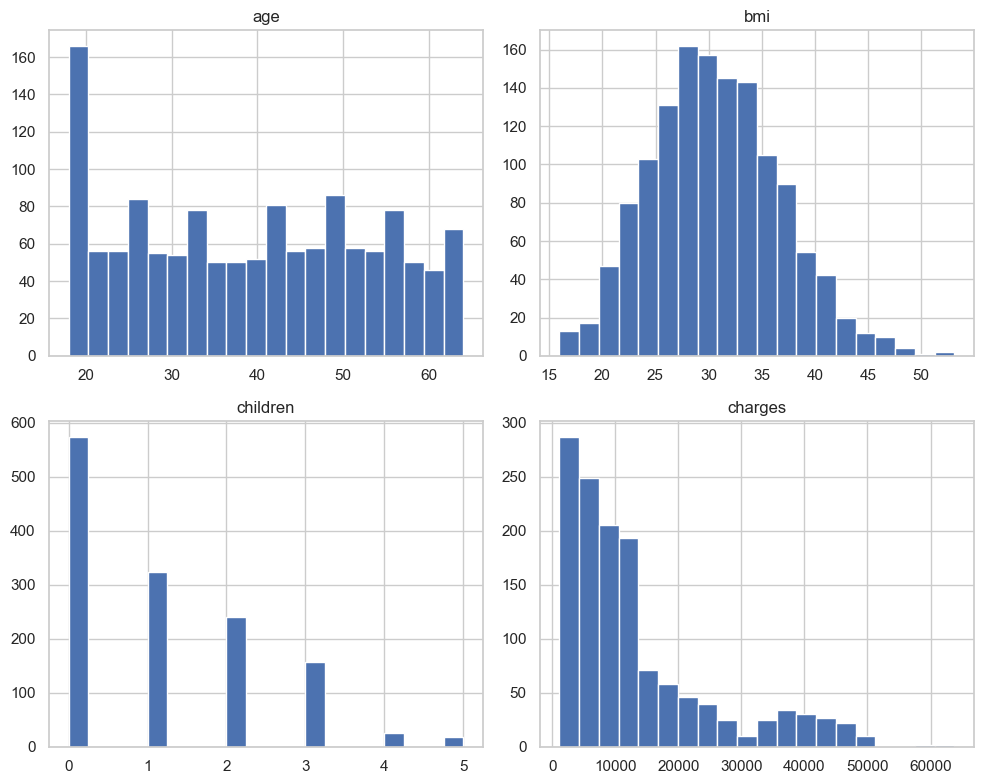

In [14]:
# Distribution Plots (Histograms)

# Histograms of numerical features
df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()


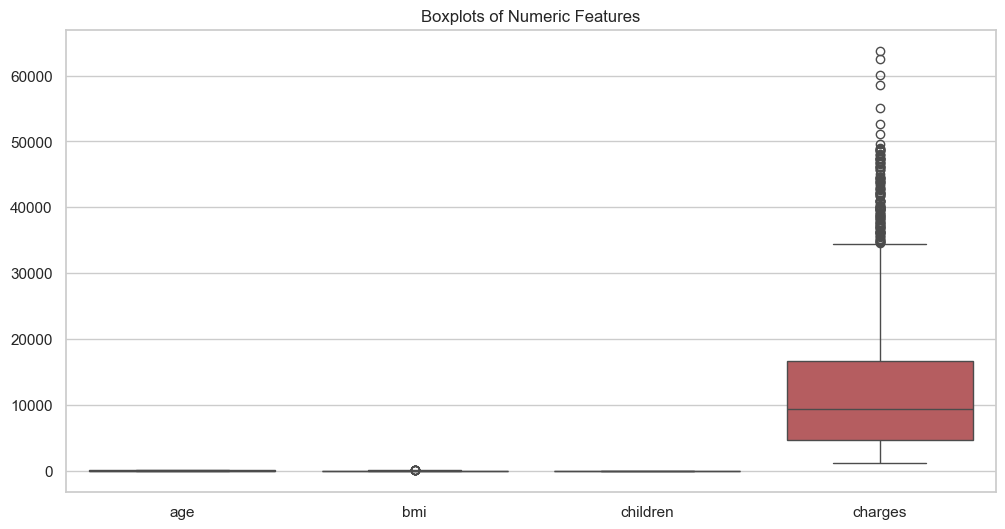

In [15]:
# Boxplots for Outliers

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['age', 'bmi', 'children', 'charges']])
plt.title("Boxplots of Numeric Features")
plt.show()


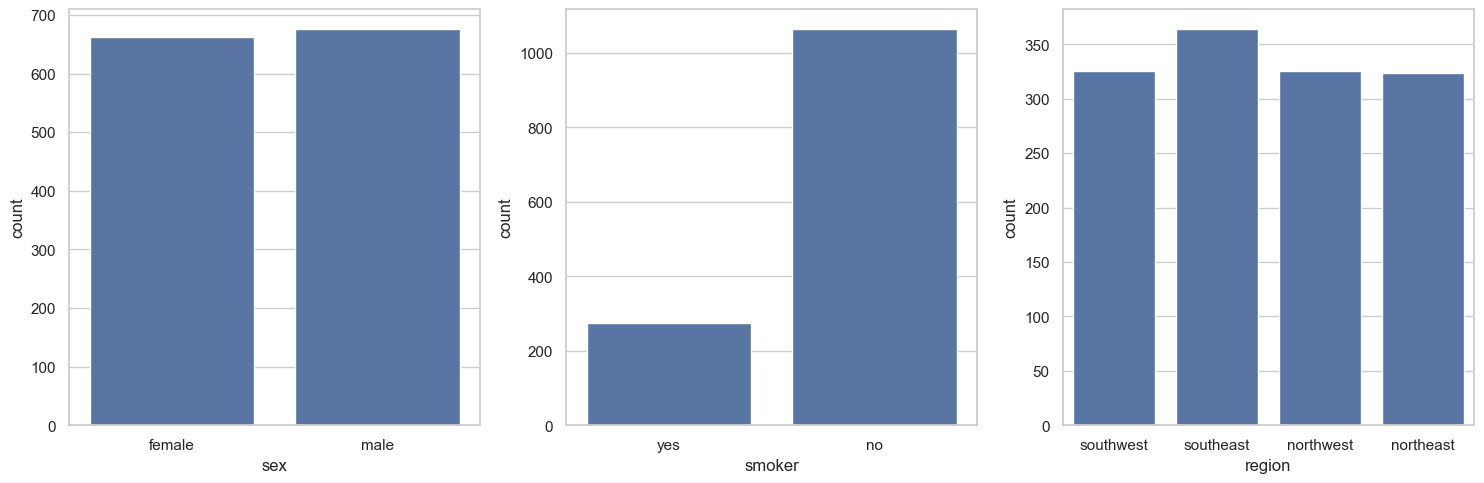

In [16]:
# Count Plots for Categorical Features

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(ax=axes[0], data=df, x='sex')
sns.countplot(ax=axes[1], data=df, x='smoker')
sns.countplot(ax=axes[2], data=df, x='region')

plt.tight_layout()
plt.show()


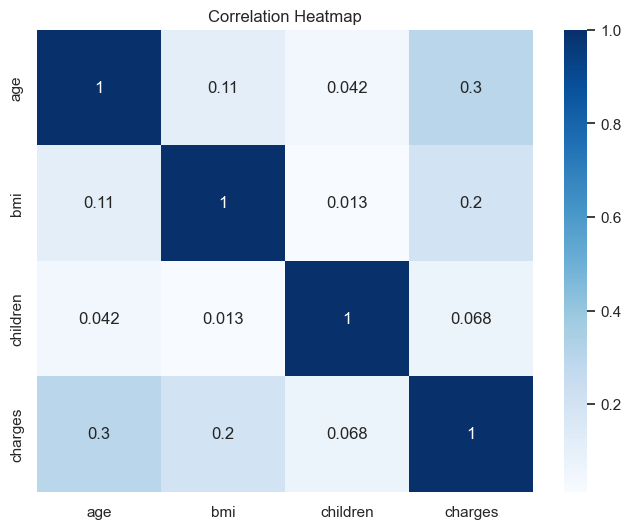

In [17]:
# Correlation Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


In [18]:
# Encode Categorical Variables

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


### Reflections

I found that smokers pay much higher medical costs.

The BMI data has some unusual high or low numbers that might skew the results.

Before I can use the data to train a model, I need to:

- Convert text categories (like 'male' or 'smoker') into numbers (one-hot encoding).

- Adjust the scale of all the numbers so they're comparable (scaling).

The data is otherwise complete, with no missing values.

## Section 3 - Feature Selection & Justification

In [19]:
# Define target variable y
y = df_encoded['charges']

# Define feature matrix X (all columns except charges)
X = df_encoded.drop('charges', axis=1)

# Display first few rows of X and y
X.head(), y.head()


(   age     bmi  children  sex_male  smoker_yes  region_northwest  \
 0   19  27.900         0     False        True             False   
 1   18  33.770         1      True       False             False   
 2   28  33.000         3      True       False             False   
 3   33  22.705         0      True       False              True   
 4   32  28.880         0      True       False              True   
 
    region_southeast  region_southwest  
 0             False              True  
 1              True             False  
 2              True             False  
 3             False             False  
 4             False             False  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

In [20]:
# Define target variable y
y = df_encoded['charges']

# Define feature matrix X (all columns except charges)
X = df_encoded.drop('charges', axis=1)

# Display first few rows of X and y
X.head(), y.head()


(   age     bmi  children  sex_male  smoker_yes  region_northwest  \
 0   19  27.900         0     False        True             False   
 1   18  33.770         1      True       False             False   
 2   28  33.000         3      True       False             False   
 3   33  22.705         0      True       False              True   
 4   32  28.880         0      True       False              True   
 
    region_southeast  region_southwest  
 0             False              True  
 1              True             False  
 2              True             False  
 3             False             False  
 4             False             False  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

### 3.1 Feature Selection and Justification

For this regression model, I selected multiple input features that are known to influence medical insurance costs. These include age, BMI, number of children, sex, smoker status, and region (encoded with one-hot variables).

- **Age** tends to increase medical costs because older individuals typically require more care.

- **BMI** is associated with health conditions that can increase expenses.

- **Children** can influence insurance charges through dependent coverage.

- **Smoker status** is one of the strongest predictors because smokers generally have higher health risks and significantly higher charges.

- **Region and sex** may have smaller effects but still contribute useful variability and help improve the model's accuracy.

The target variable, *charges*, is a continuous numeric value representing medical costs, making regression the appropriate modeling approach.

### Reflection

These features were chosen because they are the best predictors of medical charges. **Age**, **BMI**, and **smoker status** are particularly important, based on our analysis and general health knowledge. Including all available, preprocessed variables gives the model a complete view of the factors involved, ultimately helping it achieve better prediction accuracy.

## Section 4 - Train a Model (Linear Regression)

In [21]:
# Train/Test Split

from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((1070, 8), (268, 8))

In [23]:
# Train Linear Regression and Make Predictions

from sklearn.linear_model import LinearRegression

# Create the model
lin_reg = LinearRegression()

# Train (fit) the model
lin_reg.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)


In [24]:
# Evaluate the Model ($R^2$, MAE, RMSE)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Training metrics
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Testing metrics
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Display results in a clean table
metrics = pd.DataFrame({
    'Set': ['Train', 'Test'],
    'R2 Score': [r2_train, r2_test],
    'MAE': [mae_train, mae_test],
    'RMSE': [rmse_train, rmse_test]
})

metrics


,Set,R2 Score,MAE,RMSE
0,Train,0.741726,4208.234572,6105.545160
1,Test,0.783593,4181.194474,5796.284659


### Reflection

The linear regression model did about as well as I expected. The R² score on the test set was around 0.78, which tells me the model captured a good amount of the variation in medical costs, but not all of it. That makes sense because healthcare costs can be complicated and hard to predict with just a few features.

I also liked that the training and testing results were fairly close. That reassured me that the model wasn’t overfitting and could generalize pretty well. The errors (MAE and RMSE) were definitely on the higher side, but considering the scale of the “charges” values in the dataset, the numbers didn’t surprise me too much.

## Section 5 - Improve the Model/Try Alternates (Pipelines)

In [25]:
# Pipeline 1 (Scaler + Linear Regression)

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np

# Pipeline 1: Imputer + Scaler + Linear Regression
pipe1 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('linreg', LinearRegression())
])

# Fit pipeline
pipe1.fit(X_train, y_train)

# Predictions
y_train_pred_p1 = pipe1.predict(X_train)
y_test_pred_p1 = pipe1.predict(X_test)

# Metrics for Pipeline 1
r2_train_p1 = r2_score(y_train, y_train_pred_p1)
r2_test_p1 = r2_score(y_test, y_test_pred_p1)
mae_train_p1 = mean_absolute_error(y_train, y_train_pred_p1)
mae_test_p1 = mean_absolute_error(y_test, y_test_pred_p1)
rmse_train_p1 = np.sqrt(mean_squared_error(y_train, y_train_pred_p1))
rmse_test_p1 = np.sqrt(mean_squared_error(y_test, y_test_pred_p1))


In [26]:
# Pipeline 2 (Polynomial Degree 3)

from sklearn.preprocessing import PolynomialFeatures

# Pipeline 2: Imputer + Polynomial Features + Scaler + Linear Regression
pipe2 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('linreg', LinearRegression())
])

# Fit pipeline
pipe2.fit(X_train, y_train)

# Predictions
y_train_pred_p2 = pipe2.predict(X_train)
y_test_pred_p2 = pipe2.predict(X_test)

# Metrics for Pipeline 2
r2_train_p2 = r2_score(y_train, y_train_pred_p2)
r2_test_p2 = r2_score(y_test, y_test_pred_p2)
mae_train_p2 = mean_absolute_error(y_train, y_train_pred_p2)
mae_test_p2 = mean_absolute_error(y_test, y_test_pred_p2)
rmse_train_p2 = np.sqrt(mean_squared_error(y_train, y_train_pred_p2))
rmse_test_p2 = np.sqrt(mean_squared_error(y_test, y_test_pred_p2))


In [27]:
# Compare All Models (Baseline, Pipeline 1, Pipeline 2)

results = pd.DataFrame({
    'Model': [
        'Baseline Linear Regression',
        'Pipeline 1 (Scaled Linear Regression)',
        'Pipeline 2 (Polynomial Degree 3)'
    ],
    'Train R2': [r2_train, r2_train_p1, r2_train_p2],
    'Test R2': [r2_test, r2_test_p1, r2_test_p2],
    'Train MAE': [mae_train, mae_train_p1, mae_train_p2],
    'Test MAE': [mae_test, mae_test_p1, mae_test_p2],
    'Train RMSE': [rmse_train, rmse_train_p1, rmse_train_p2],
    'Test RMSE': [rmse_test, rmse_test_p1, rmse_test_p2]
})

results


,Model,Train R2,Test R2,Train MAE,Test MAE,Train RMSE,Test RMSE
0,Baseline Linear Regression,0.741726,0.783593,4208.234572,4181.194474,6105.545160,5796.284659
1,Pipeline 1 (Scaled Linear Regression),0.741726,0.783593,4208.234572,4181.194474,6105.545160,5796.284659
2,Pipeline 2 (Polynomial Degree 3),0.854952,0.848641,2792.779239,2937.918593,4575.510839,4847.496055


### Reflection

Scaling didn’t change anything for my linear regression model, which actually makes sense now that I think about it. The baseline model and the scaled version gave the exact same results across all metrics.

The polynomial model, on the other hand, performed much better. Both the Train and Test R² scores went up to around 0.85, which is quite a big improvement compared to the baseline. The MAE and RMSE values also dropped a lot, so the errors were smaller overall. I was glad to see that the training and testing scores stayed fairly close to each other, because that makes me feel more confident that the model wasn’t overfitting. Overall, the polynomial features helped the model capture more of the complexity in the data.


## Section 6 - Final Thoughts & Insights

### 6.1 Summary of Findings

This project helped me see how different features connect to medical costs. The baseline linear regression model worked pretty well on its own, which gave me a good starting point. When I tried the pipelines, the scaled version didn’t change anything, but the polynomial model made a big difference. It picked up more of the patterns in the data and improved all of the metrics. It was interesting to see how much better the model performed once it was allowed to capture more complex relationships.

### 6.2 Challenges Faced

My biggest challenge was just keeping everything straight as I moved through the steps. Sometimes I still feel like I’m piecing things together as I go. I also had some trouble early on getting the notebook to display correctly because of a file path issue. Once that was fixed, things went much more smoothly. The modeling part still takes me a little time to think through, but I’m getting more comfortable with it.

### 6.3 If I Had More Time

If I had more time, I’d like to try some of the other models we’ve talked about in class, like Random Forest or Gradient Boosting, just to see how they compare. I’d also be interested in learning more about regularization and how it helps when models get too complex. There is still a lot for me to learn, but this project was a good step in the right direction.

